In [1]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset

df = pd.read_csv("data/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.rename(columns = {'label':'Crop'}, inplace = True)
df

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
# Shuffling data to remove order effects

# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(df,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


In [5]:
# Selection of Feature and Target variables.

x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [6]:
# Encoding target variable 

y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1832,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
293,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1032,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2121,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### Splitting data 

In [7]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


### Random Forest 

In [8]:
# Training

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [9]:
# Predicting test results 

forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [10]:
# Calculating Accuracy

a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.98


In [11]:
#Cross-Validation

score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.97575758, 0.96666667, 0.95454545, 0.96666667, 0.96969697])

In [12]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

96.67

In [13]:
c1 = (score.std()*100)
c1

0.6910154091509904

In [14]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 96.67%
Standard Deviation : 0.69%


### Decision Tree

In [15]:
# Training

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [16]:
# Predicting test results 

decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [17]:
# Calculating Accuracy

a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.9436363636363636


0.9436363636363636

In [18]:
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.88135593, 0.91525424, 0.90677966, 0.93220339, 0.92372881,
       0.96595745, 0.94468085])

In [19]:
b2 = "{:.2f}".format(score.mean()*100)
b2 = float(b2)
b2

92.43

In [20]:
c2 = (score.std()*100)
c2

2.5203429649690308

### KNN 

In [21]:
#Training

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [22]:
knn_pred = model.predict(x_test)
knn_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [23]:
# Calculating Accuracy

a3 = accuracy_score(y_test,knn_pred)
print('Accuracy score:', accuracy_score(y_test,knn_pred))
a3

Accuracy score: 0.9745454545454545


0.9745454545454545

In [24]:
score = cross_val_score(model,X = x_train, y = y_train,cv=7)
score

array([0.99152542, 0.97457627, 0.97881356, 0.97457627, 0.98305085,
       0.9787234 , 0.99148936])

In [25]:
b3 = "{:.2f}".format(score.mean()*100)
b3 = float(b3)
b3

98.18

In [26]:
c3 = (score.std()*100)
c3

0.668449766475269

### Model Comparison 

In [27]:
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'KNN Classifier'],
        'Accuracy':[b1, b2, b3],
        'Standard Deviation':[c1,c2,c3]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data)
 
# print the data
df

,Algorithms,Accuracy,Standard Deviation
0,Random Forest,96.67,0.691015
1,Decision-tree,92.43,2.520343
2,KNN Classifier,98.18,0.668450


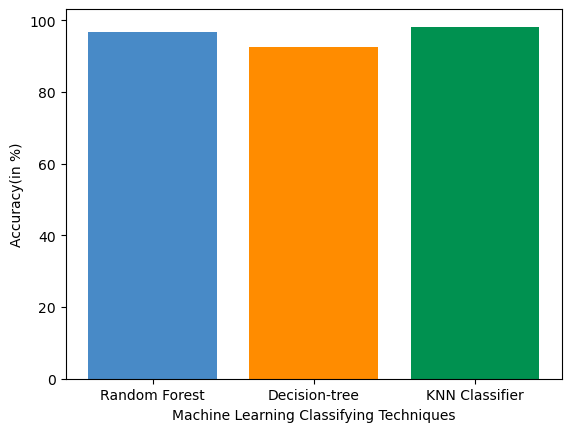

In [28]:
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN Classifier']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

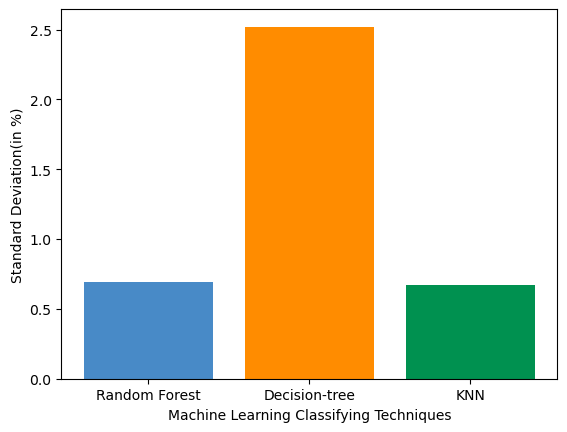

In [29]:
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN']
Accuracy = [c1, c2, c3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color= ['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

##### Conclusion

- Model with Higher accuracy and low standard deviation is a good model
- So, KNN is best among 3 models